In [1]:
import random, numpy as np, pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
alphap = 2
probp = 0.75
expon = 2 * alphap - 1
ensemble_sizep = 1_000
min_iterationp = 10_000

signature = 'data_collapse_alpha_2_'
analytic_data_dir = "../data/alpha3/analytic/"  # data directory


In [2]:
# other directories
simulation_data_dir = "../data/temp/"
out_data_dir = "../data/temp/"
fig_dir = "../figures/temp/"

if not os.path.exists(simulation_data_dir):
    os.makedirs(simulation_data_dir)
if not os.path.exists(out_data_dir):
    os.makedirs(out_data_dir)
if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)

In [3]:
%run ../stochastic_fractal_m.py

## Simulation

In [4]:
true_lenthgs = TrueLengths(alpha = alphap, probability=probp)

kwargs  {'alpha': 2, 'probability': 0.75}
Turning on logging


In [5]:
out_data = true_lenthgs.run_ensemble(ensemble_sizep, min_iterationp)

realization  1  . Time spent  0.012354373931884766  sec
realization  11  . Time spent  0.10803079605102539  sec
realization  21  . Time spent  0.11358952522277832  sec
realization  31  . Time spent  0.10642027854919434  sec
realization  41  . Time spent  0.10277056694030762  sec
realization  51  . Time spent  0.1336050033569336  sec
realization  61  . Time spent  0.1044013500213623  sec
realization  71  . Time spent  0.10663104057312012  sec
realization  81  . Time spent  0.11757588386535645  sec
realization  91  . Time spent  0.11066555976867676  sec
realization  101  . Time spent  0.13055992126464844  sec
realization  111  . Time spent  0.10269045829772949  sec
realization  121  . Time spent  0.10409927368164062  sec
realization  131  . Time spent  0.11231374740600586  sec
realization  141  . Time spent  0.12801265716552734  sec
realization  151  . Time spent  0.15116643905639648  sec
realization  161  . Time spent  0.11970758438110352  sec
realization  171  . Time spent  0.135606050

In [6]:
true_lenthgs.save_to_file(simulation_data_dir)

In [7]:
def bin_maker(max_value, bin_number):
    bin_size = max_value/bin_number
    bins = [0.]
    for i in range(bin_number):
        bin_edge = (i+1)*bin_size
        bins.append(bin_edge)
        pass
    return bins

In [16]:
def histrogram_data(data, bin_size = 0.0001):
    bin_number = int((np.max(data) - np.min(data))//bin_size) + 1
    y, x = np.histogram(data, bins = bin_number)
    return x[1:], y

## How to fit data

$\phi \equiv \text{simulation}$
$\phi^{(th)} \equiv \text{theoritical or analytical}$

$$cost = \sum_t \sum_i (b*\phi_{i t} - \phi_{i t}^{(th)})^2 \$$

we need to minimize $cost$. We get the value of $b$ as

$$b = \frac{\sum_t \sum_i \phi_{i t} \phi_{i t}^{(th)}}{\sum_t \sum_i \phi_{i t}^2}$$

In [9]:
def fitting_parameter(given_array,ref_array):
    a1 = np.multiply(given_array,ref_array)
    a2 = np.multiply(given_array,given_array)
    a1_sum = np.sum(a1)
    a2_sum = np.sum(a2)
    return a1_sum, a2_sum

In [10]:
# ens_10k = ensembling(10_000, ensemble_sizep)
# x1, y1 = histrogram_data(ens_10k)
# ens_20k = ensembling(20_000, ensemble_sizep)
# x2, y2 = histrogram_data(ens_20k)
# ens_30k = ensembling(30_000, ensemble_sizep)
# x3, y3 = histrogram_data(ens_30k)

In [11]:
def plot_data(total_iteration, ens_data):
    df = find_df(alphap,probp)
    
    x,y = histrogram_data(ens_data)
    xi = x*total_iteration**(1/(2*alphap-1))
    phi = y/(total_iteration**((1+df)/(2*alphap-1)))
    phi_analytic = phi_list(alphap,probp,xi)
    a1_sum, a2_sum = fitting_parameter(phi,phi_analytic)
    return xi, phi, a1_sum, a2_sum

In [12]:
data_dict = {}
a1_sum, a2_sum = 0,0
for i in range(3):
    time_t = min_iterationp*(i+1)
    
    # simulate using class method
    ens_data = true_lenthgs.run_ensemble(ensemble_sizep, time_t)
    true_lenthgs.save_to_file(simulation_data_dir) # save to file for later use
    xi, phi, a1, a2 = plot_data(time_t, ens_data)
    data_dict[time_t]=[xi,phi]
    a1_sum += a1
    a2_sum += a2
    
for i in range(3):
    time_t = min_iterationp*(i+1)
    data_dict[time_t][1]*=(a1_sum/a2_sum)

realization  1  . Time spent  0.01548910140991211  sec
realization  11  . Time spent  0.1295757293701172  sec
realization  21  . Time spent  0.11879229545593262  sec
realization  31  . Time spent  0.14913201332092285  sec
realization  41  . Time spent  0.1311330795288086  sec
realization  51  . Time spent  0.14187407493591309  sec
realization  61  . Time spent  0.12732195854187012  sec
realization  71  . Time spent  0.13013768196105957  sec
realization  81  . Time spent  0.14548802375793457  sec
realization  91  . Time spent  0.12246370315551758  sec
realization  101  . Time spent  0.12808489799499512  sec
realization  111  . Time spent  0.13775014877319336  sec
realization  121  . Time spent  0.1358506679534912  sec
realization  131  . Time spent  0.13100647926330566  sec
realization  141  . Time spent  0.13626551628112793  sec
realization  151  . Time spent  0.14455485343933105  sec
realization  161  . Time spent  0.12562823295593262  sec
realization  171  . Time spent  0.13728976249

realization  451  . Time spent  0.23871731758117676  sec
realization  461  . Time spent  0.24880599975585938  sec
realization  471  . Time spent  0.24433493614196777  sec
realization  481  . Time spent  0.24919962882995605  sec
realization  491  . Time spent  0.26036500930786133  sec
realization  501  . Time spent  0.23499798774719238  sec
realization  511  . Time spent  0.26723265647888184  sec
realization  521  . Time spent  0.25623536109924316  sec
realization  531  . Time spent  0.23305654525756836  sec
realization  541  . Time spent  0.2663147449493408  sec
realization  551  . Time spent  0.24921345710754395  sec
realization  561  . Time spent  0.2442166805267334  sec
realization  571  . Time spent  0.25495243072509766  sec
realization  581  . Time spent  0.2969086170196533  sec
realization  591  . Time spent  0.2187795639038086  sec
realization  601  . Time spent  0.2642405033111572  sec
realization  611  . Time spent  0.27266645431518555  sec
realization  621  . Time spent  0.24

realization  901  . Time spent  0.3753378391265869  sec
realization  911  . Time spent  0.39924049377441406  sec
realization  921  . Time spent  0.3956012725830078  sec
realization  931  . Time spent  0.38002586364746094  sec
realization  941  . Time spent  0.38378143310546875  sec
realization  951  . Time spent  0.38841819763183594  sec
realization  961  . Time spent  0.40593910217285156  sec
realization  971  . Time spent  0.3818199634552002  sec
realization  981  . Time spent  0.413377046585083  sec
realization  991  . Time spent  0.42047619819641113  sec
Total time spent  38.41254901885986  sec


In [13]:

for i in range(3):
    time_t = min_iterationp*(i+1)
    x,y = data_dict[time_t]
    file_name = signature+"t_{}k".format(int(time_t//1000))
    np.savetxt(out_data_dir+file_name, np.c_[x,y])

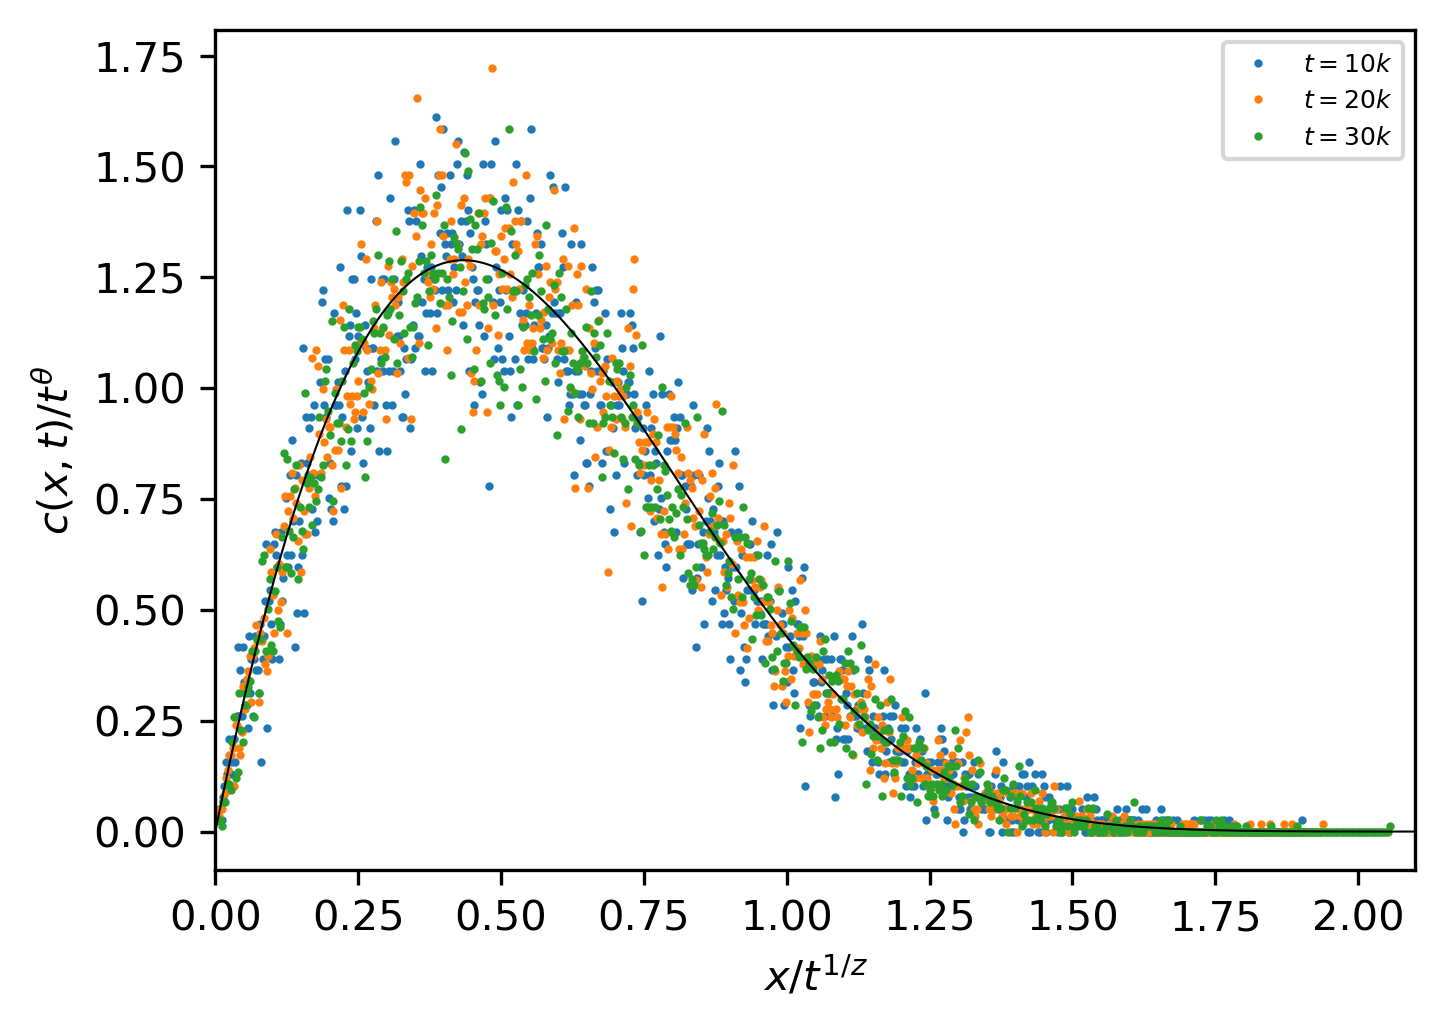

In [15]:
fig, axes = plt.subplots(1,1,figsize = (5,3.5),dpi = 300)

for i in range(3):
    time_t = min_iterationp*(i+1)
    x,y = data_dict[time_t]
    plt.plot(x, y,"o", markersize=1,label=r"$t={}k$".format(str(int(time_t//1000))))

xi_th = np.linspace(0,2.1,10501)
phi_th = phi_list(alphap,probp,xi_th)
plt.plot(xi_th,phi_th,color='black',linewidth=0.5)

plt.legend(fontsize=6, loc=1)
plt.xlabel(r"$x/t^{1/z}$")
plt.ylabel(r"$c(x,t)/t^\theta$")
plt.xlim([0, 2.1])
axes.set_position([0.15, 0.15, 0.8, 0.8])

filename = fig_dir + signature + "_plot.pdf"
plt.savefig(filename)

## Generating data file

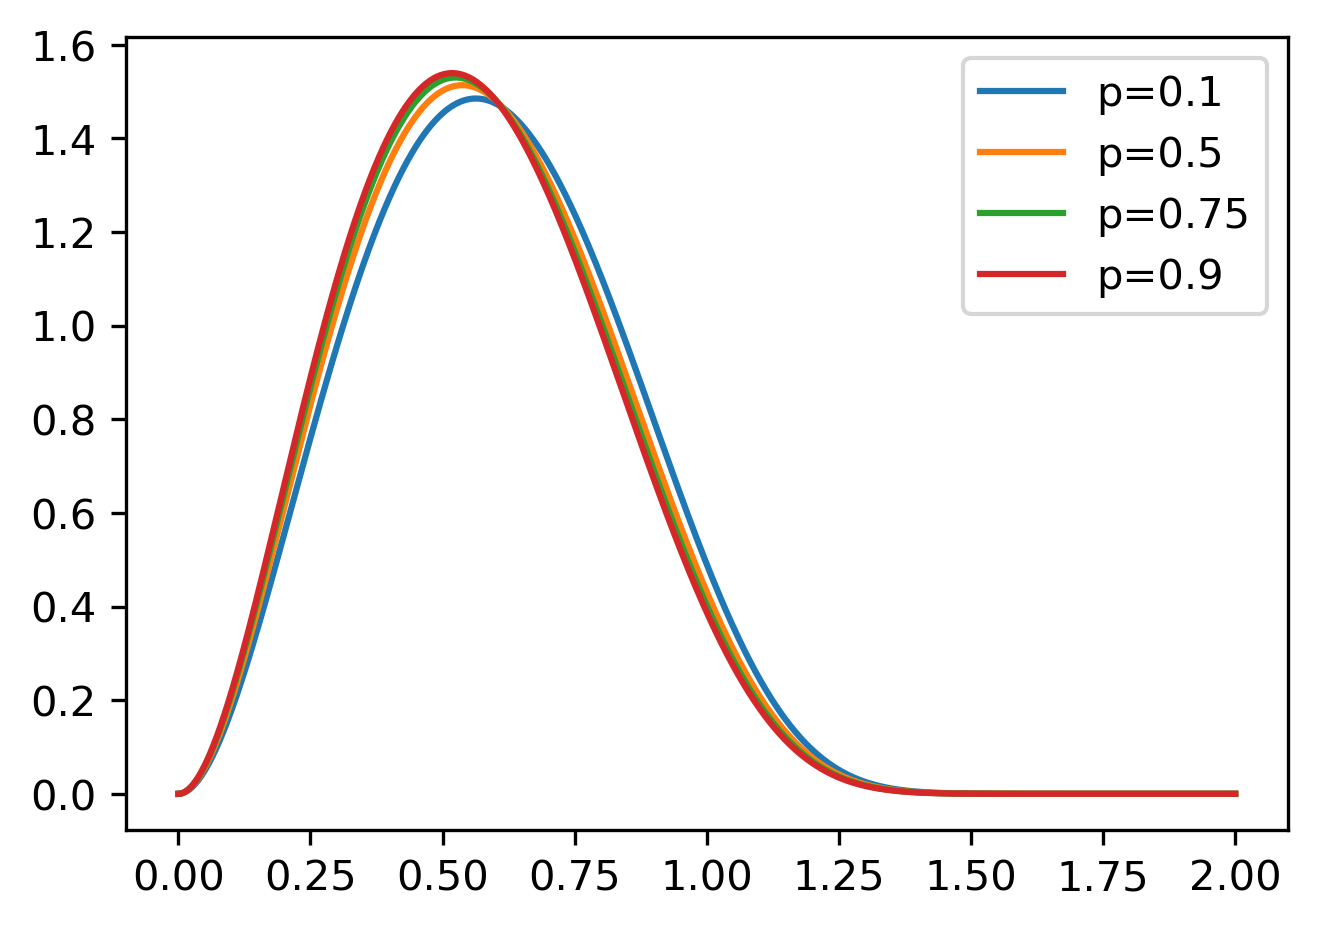

In [13]:
xi_list = np.linspace(0, 2, 10_001)

data_dct = {}

filename = 'phi_0_10_list.csv'
phi_list = np.loadtxt(analytic_data_dir + filename)
data_dct[0.1] = phi_list


filename = 'phi_0_50_list.csv'
phi_list = np.loadtxt(analytic_data_dir + filename)
data_dct[0.5] = phi_list


filename = 'phi_0_75_list.csv'
phi_list = np.loadtxt(analytic_data_dir + filename)
data_dct[0.75] = phi_list

filename = 'phi_0_90_list.csv'
phi_list = np.loadtxt(analytic_data_dir + filename)
data_dct[0.9] = phi_list

fig, axes = plt.subplots(1,1,figsize = (5,3.5),dpi = 300)
for a in data_dct.keys():
    phi = data_dct[a]
    plt.plot(xi_list, phi, label="p={}".format(a))
    pass

plt.legend()




In [17]:
header = {}
header['alpha'] = 3
header['probability'] = [0.1, 0.5, 0.75, 0.9]
header['delta xi'] = 2/10_000
header['columns'] = ['xi', 'phi(xi,p=0.1)', 'phi(xi,p=0.5)', 'phi(xi,p=0.75)', 'phi(xi,p=0.9)']
import datetime
import json
dt = datetime.datetime.now()
header['datetime'] = dt.strftime("%Y%m%d_%H%M")
print(header)

{'alpha': 3, 'probability': [0.1, 0.5, 0.75, 0.9], 'delta xi': 0.0002, 'columns': ['xi', 'phi(xi,p=0.1)', 'phi(xi,p=0.5)', 'phi(xi,p=0.75)', 'phi(xi,p=0.9)'], 'datetime': '20200926_1050'}


In [18]:
filename="phi_list_analytic_alpha_3.txt"
data = np.c_[xi_list, data_dct[0.1], data_dct[0.5], data_dct[0.75], data_dct[0.9]]
np.savetxt(analytic_data_dir + filename, data, header=json.dumps(header))

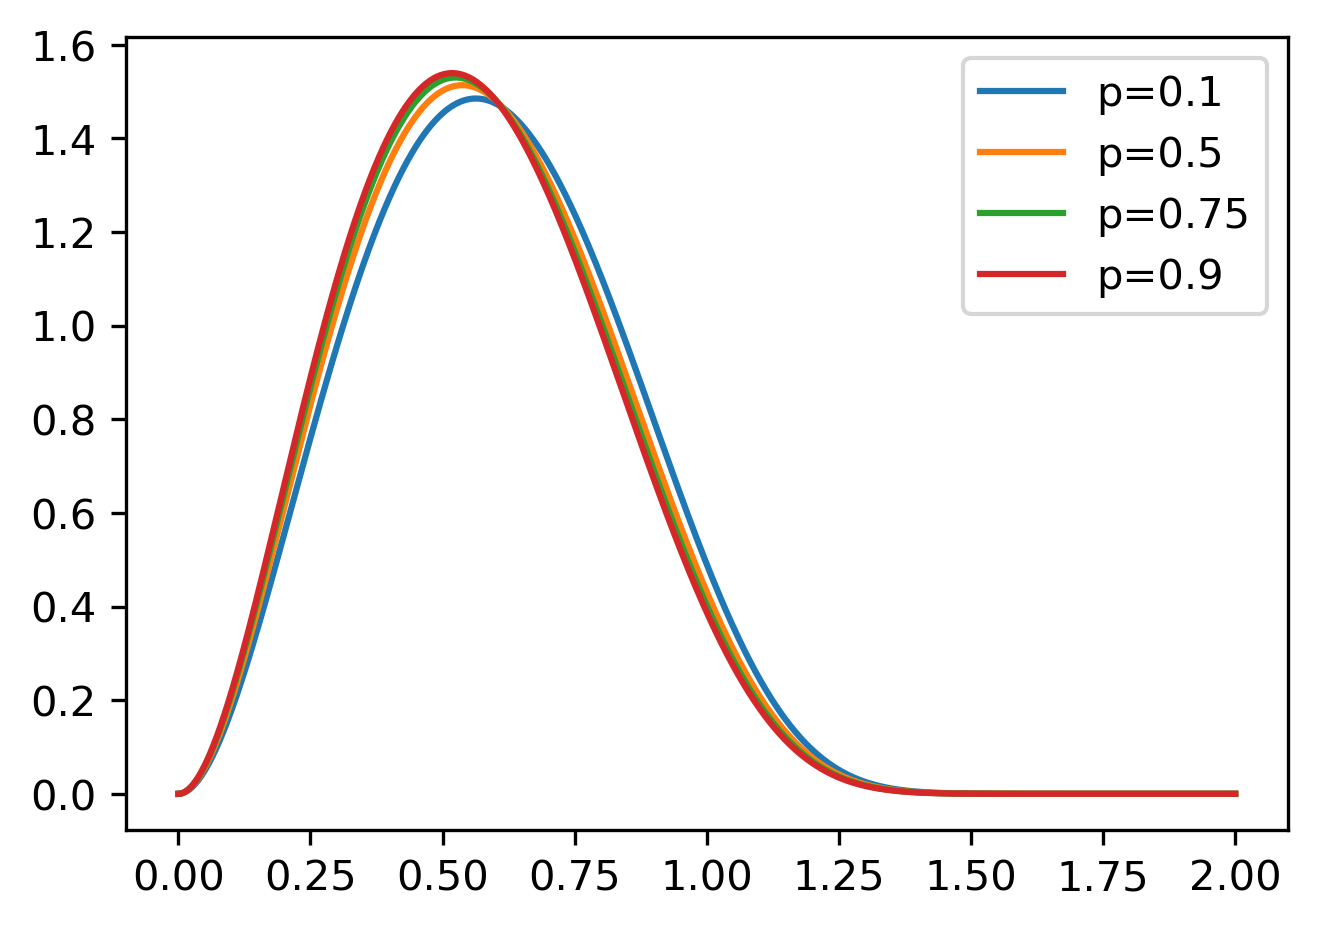

In [16]:
data = np.loadtxt(analytic_data_dir + filename)
fig, axes = plt.subplots(1,1,figsize = (5,3.5),dpi = 300)
plt.plot(data[:,0], data[:,1], label="p=0.1")
plt.plot(data[:,0], data[:,2], label="p=0.5")
plt.plot(data[:,0], data[:,3], label="p=0.75")
plt.plot(data[:,0], data[:,4], label="p=0.9")
plt.legend()

In [33]:
xi = 0.002

In [34]:
xi % 0.0002

0.00019999999999999996